# Fake News Team Final Presentation


- Brian Kalinowski
- Tori Tenny 
- Shaun Marks

## Imports

In [1]:
from typing import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Custom Code imports
import sys
sys.path.insert(0, '/Users/briankalinowski/PycharmProjects/FakeNewsChallenge/Code')
import PresentationUtils as pre

## Data: Full Training/Testing, CNN/Ensemble Text Categorizer & LSTM Results

In [2]:
# Full Training/Testing Data
news_data = pd.read_csv('/Users/briankalinowski/Desktop/Data/news_content_lemma.csv')

# Testing data and results from the CNN Text Categorizer model
cnn_results_df = pd.read_csv('/Users/briankalinowski/Desktop/Data/textcat_CNN_test.csv')

# Testing data and results from the Ensemble Text Categorizer model
ensemble_results_df = pd.read_csv('/Users/briankalinowski/Desktop/Data/textcat_ensemble_test.csv')

# Testing data and results from the LSTM model
lstm_results_df = pd.read_csv('/Users/briankalinowski/Desktop/Data/lstm_test.csv')

# Testing data and results from the sentiment and LDA RF model
sentiment_lda_results = pd.read_csv('/Users/briankalinowski/Desktop/Data/sentiment_lda_test.csv')

## Processed Data Stats

In [3]:
print('Full News Data Stats:')
print('Shape:', news_data.shape)
print('Fake Article Count: {} Real Article Count: {}'.format(news_data.valid_score.value_counts()[0], 
                                                             news_data.valid_score.value_counts()[1]))

pd.DataFrame(news_data.groupby(['valid_score', 'type']).size(), columns=['article_count'])

Full News Data Stats:
Shape: (26227, 6)
Fake Article Count: 11750 Real Article Count: 14477


article_count
valid_score type                              
0           bias                           400
            bs                           10352
            conspiracy                     422
            fake                            19
            hate                           242
            junksci                        100
            satire                          96
            state                          119
1           Atlantic                      1000
            Breitbart                     1000
            Business Insider               997
            Buzzfeed News                 1000
            CNN                           1000
            Fox News                       907
            Guardian                       999
            NPR                           1000
            National Review               1000
            New York Post                 1000
            New York Times                 999
            Reuters                       1000
            Talking Points Memo            577
            Vox                           1000
            Washington Post                998

## CNN Text Categorizer Results

In [4]:
pre.format_confusion_matrix(cnn_results_df.valid_score, cnn_results_df.valid_prediction)

,Predict_Fake,Predict_Real,True_Totals
True_Fake,5664,193,5857
True_Real,164,7093,7257


In [5]:
pre.format_classification_report(cnn_results_df.valid_score, cnn_results_df.valid_prediction)

,precision,recall,f1-score,support
fake,0.971860,0.967048,0.969448,5857.000000
real,0.973511,0.977401,0.975452,7257.000000
accuracy,0.972777,0.972777,0.972777,0.972777
macro avg,0.972685,0.972225,0.972450,13114.000000
weighted avg,0.972774,0.972777,0.972771,13114.000000


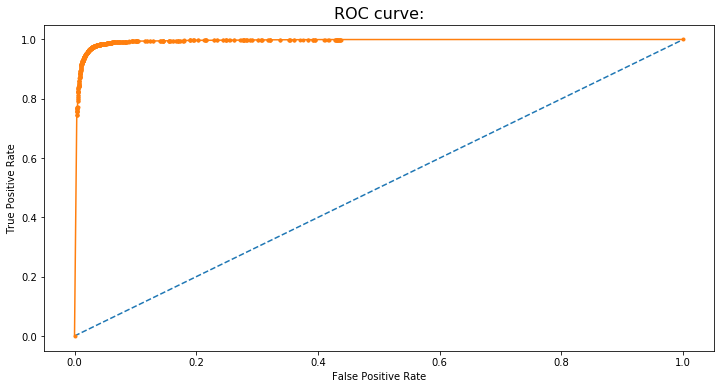

In [6]:
plt.figure(figsize=(12,6))
pre.plot_roc(cnn_results_df.valid_score, cnn_results_df.real_weighted_score)

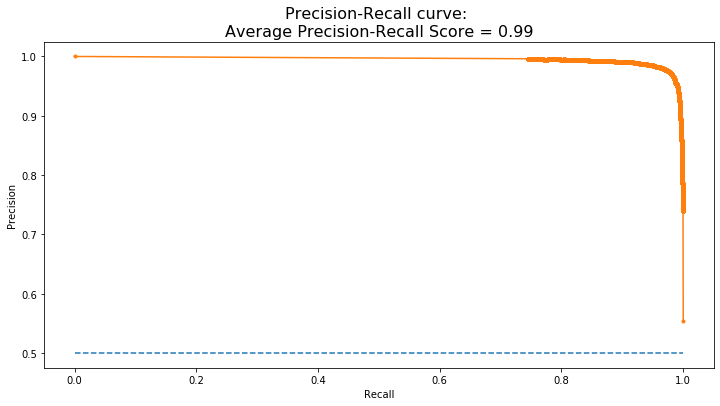

In [7]:
plt.figure(figsize=(12,6))
pre.plot_pre_rec_curve(cnn_results_df.valid_score, cnn_results_df.real_weighted_score)

## Ensemble Text Categorizer Results

In [8]:
pre.format_confusion_matrix(ensemble_results_df.valid_score, ensemble_results_df.valid_prediction)

,Predict_Fake,Predict_Real,True_Totals
True_Fake,5588,269,5857
True_Real,177,7080,7257


In [9]:
pre.format_classification_report(ensemble_results_df.valid_score, ensemble_results_df.valid_prediction)

,precision,recall,f1-score,support
fake,0.969297,0.954072,0.961625,5857.000000
real,0.963396,0.975610,0.969465,7257.000000
accuracy,0.965991,0.965991,0.965991,0.965991
macro avg,0.966347,0.964841,0.965545,13114.000000
weighted avg,0.966032,0.965991,0.965963,13114.000000


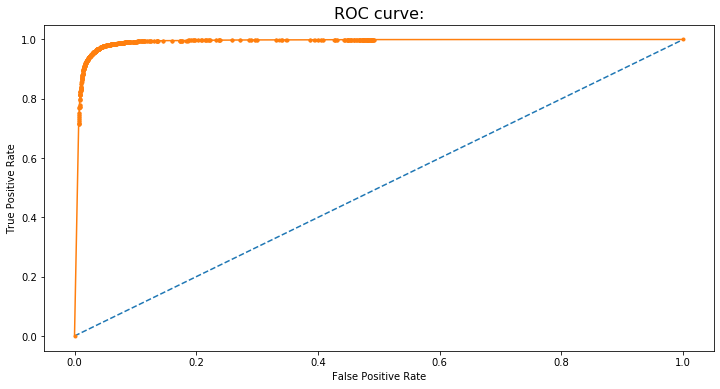

In [10]:
plt.figure(figsize=(12,6))
pre.plot_roc(ensemble_results_df.valid_score, ensemble_results_df.real_weighted_score)

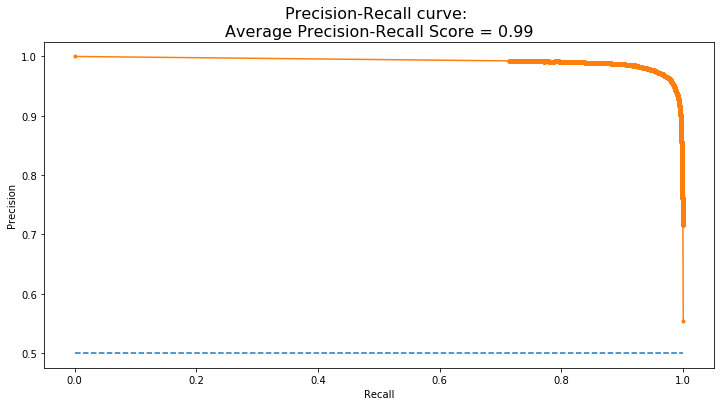

In [11]:
plt.figure(figsize=(12,6))
pre.plot_pre_rec_curve(ensemble_results_df.valid_score, ensemble_results_df.real_weighted_score)

## LSTM Model Results

In [12]:
pre.format_confusion_matrix(lstm_results_df.valid_score, lstm_results_df.valid_prediction)

,Predict_Fake,Predict_Real,True_Totals
True_Fake,5409,448,5857
True_Real,626,6631,7257


In [13]:
pre.format_classification_report(lstm_results_df.valid_score, lstm_results_df.valid_prediction)

,precision,recall,f1-score,support
fake,0.896272,0.923510,0.909687,5857.000000
real,0.936714,0.913738,0.925084,7257.000000
accuracy,0.918103,0.918103,0.918103,0.918103
macro avg,0.916493,0.918624,0.917385,13114.000000
weighted avg,0.918652,0.918103,0.918207,13114.000000


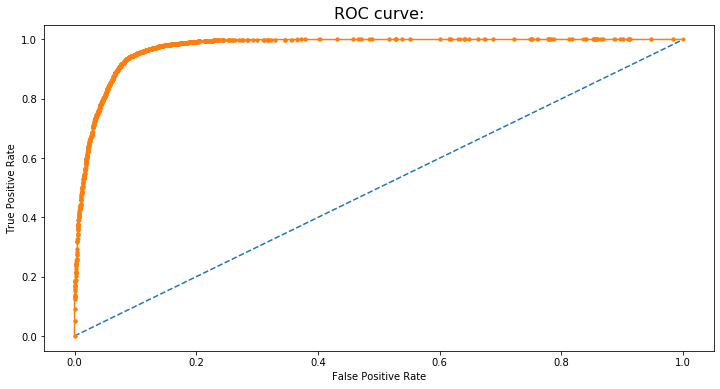

In [14]:
plt.figure(figsize=(12,6))
pre.plot_roc(lstm_results_df.valid_score, lstm_results_df.real_weighted_score)

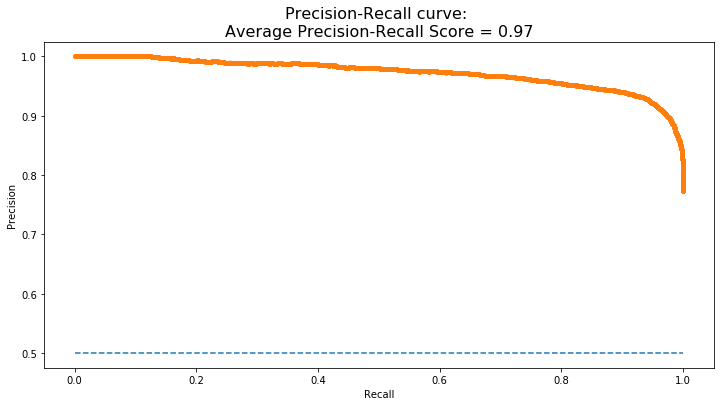

In [15]:
plt.figure(figsize=(12,6))
pre.plot_pre_rec_curve(lstm_results_df.valid_score, lstm_results_df.real_weighted_score)

## Random Forest with Sentiment Scores & LDA Topics Results

In [16]:
pre.format_confusion_matrix(sentiment_lda_results.valid_score, sentiment_lda_results.valid_prediction)

,Predict_Fake,Predict_Real,True_Totals
True_Fake,4934,923,5857
True_Real,353,6904,7257


In [17]:
pre.format_classification_report(sentiment_lda_results.valid_score, sentiment_lda_results.valid_prediction)

,precision,recall,f1-score,support
fake,0.933232,0.842411,0.885499,5857.000000
real,0.882075,0.951357,0.915407,7257.000000
accuracy,0.902699,0.902699,0.902699,0.902699
macro avg,0.907654,0.896884,0.900453,13114.000000
weighted avg,0.904923,0.902699,0.902049,13114.000000


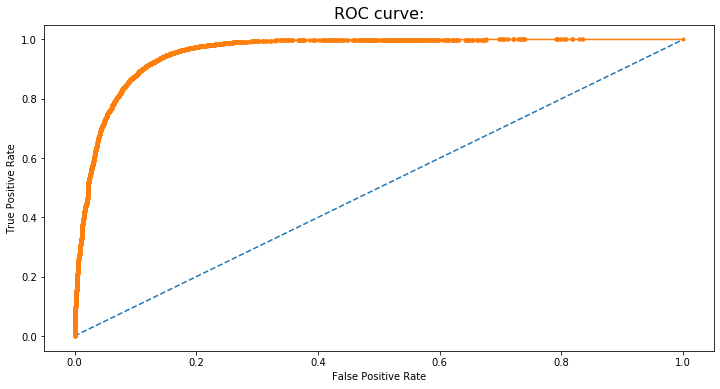

In [18]:
plt.figure(figsize=(12,6))
pre.plot_roc(sentiment_lda_results.valid_score, sentiment_lda_results.real_prob)

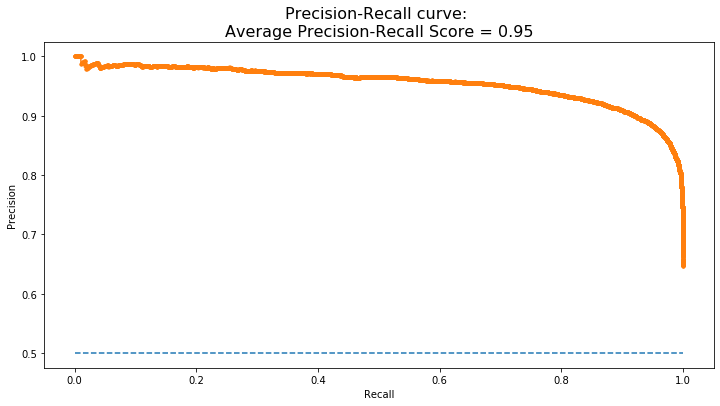

In [19]:
plt.figure(figsize=(12,6))
pre.plot_pre_rec_curve(sentiment_lda_results.valid_score, sentiment_lda_results.real_prob)

## Exploring Model Errors 

In [20]:
# CNN Errors DataFrame
cnn_errors_df = cnn_results_df[cnn_results_df.valid_score != 
                               cnn_results_df.valid_prediction].reset_index(drop=True)

# CNN False positive/negative
cnn_fp = cnn_errors_df[(cnn_errors_df.valid_score == 0) & (cnn_errors_df.valid_prediction == 1)]
cnn_fn = cnn_errors_df[(cnn_errors_df.valid_score == 1) & (cnn_errors_df.valid_prediction == 0)]


# Ensemble Errors DataFrame
ens_errors_df = ensemble_results_df[ensemble_results_df.valid_score != 
                                    ensemble_results_df.valid_prediction].reset_index(drop=True)

# Ensemble False positive/negative
ens_fp = ens_errors_df[(ens_errors_df.valid_score == 0) & (ens_errors_df.valid_prediction == 1)]
ens_fn = ens_errors_df[(ens_errors_df.valid_score == 1) & (ens_errors_df.valid_prediction == 0)]


# LSTM Errors DataFrame
lstm_errors_df = lstm_results_df[lstm_results_df.valid_score != 
                                 lstm_results_df.valid_prediction].reset_index(drop=True)

# LSTM False positive/negative
lstm_fp = lstm_errors_df[(lstm_errors_df.valid_score == 0) & (lstm_errors_df.valid_prediction == 1)]
lstm_fn = lstm_errors_df[(lstm_errors_df.valid_score == 1) & (lstm_errors_df.valid_prediction == 0)]


# Sentiment RF model errors
rf_errors_df = sentiment_lda_results[sentiment_lda_results.valid_score != 
                                     sentiment_lda_results.valid_prediction].reset_index(drop=True)

# RF False positive/negative
rf_fp = rf_errors_df[(rf_errors_df.valid_score == 0) & (rf_errors_df.valid_prediction == 1)]
rf_fn = rf_errors_df[(rf_errors_df.valid_score == 1) & (rf_errors_df.valid_prediction == 0)]


print('CNN Total Errors:', cnn_errors_df.shape[0])
print('CNN False Positives:', cnn_fp.shape[0])
print('CNN False Negatives:', cnn_fn.shape[0], '\n')

print('Ensemble Total Errors:', ens_errors_df.shape[0])
print('Ensemble False Positives:', ens_fp.shape[0])
print('Ensemble False Negatives:', ens_fn.shape[0], '\n')

print('LSTM Total Errors:', lstm_errors_df.shape[0])
print('LSTM False Positives:', lstm_fp.shape[0])
print('LSTM False Negatives:', lstm_fn.shape[0], '\n')

print('RF Total Errors:', rf_errors_df.shape[0])
print('RF False Positives:', rf_fp.shape[0])
print('RF False Negatives:', rf_fn.shape[0])

CNN Total Errors: 357
CNN False Positives: 193
CNN False Negatives: 164 

Ensemble Total Errors: 446
Ensemble False Positives: 269
Ensemble False Negatives: 177 

LSTM Total Errors: 1074
LSTM False Positives: 448
LSTM False Negatives: 626 

RF Total Errors: 1276
RF False Positives: 923
RF False Negatives: 353


### Model Errors Article Type Comparison 

In [21]:
# Type Comparision DataFrame
pd.DataFrame([cnn_errors_df.type.value_counts().to_dict(), 
              ens_errors_df.type.value_counts().to_dict(),
              lstm_errors_df.type.value_counts().to_dict(),
              rf_errors_df.type.value_counts().to_dict()], index=['CNN', 'ENS', 'LSTM', 'RF']).transpose()

,CNN,ENS,LSTM,RF
bs,155.0,225.0,382.0,833.0
Breitbart,37.0,43.0,75.0,13.0
Guardian,26.0,24.0,59.0,4.0
National Review,18.0,18.0,70.0,14.0
hate,18.0,19.0,33.0,28.0
Vox,13.0,8.0,52.0,34.0
Business Insider,13.0,12.0,48.0,78.0
bias,13.0,13.0,14.0,18.0
New York Post,12.0,16.0,36.0,7.0
Washington Post,11.0,16.0,35.0,10.0


### False Positive Article Type Comparision

In [22]:
pd.DataFrame([cnn_fp.type.value_counts().to_dict(), 
              ens_fp.type.value_counts().to_dict(),
              lstm_fp.type.value_counts().to_dict(),
              rf_fp.type.value_counts().to_dict()], index=['CNN', 'ENS', 'LSTM', 'RF']).transpose()

,CNN,ENS,LSTM,RF
bs,155.0,225.0,382.0,833.0
hate,18.0,19.0,33.0,28.0
bias,13.0,13.0,14.0,18.0
satire,5.0,4.0,7.0,5.0
junksci,1.0,5.0,5.0,22.0
conspiracy,1.0,3.0,7.0,15.0
state,NaN,NaN,NaN,2.0


### False Negative Article Type Comparision

In [23]:
pd.DataFrame([cnn_fn.type.value_counts().to_dict(), 
              ens_fn.type.value_counts().to_dict(),
              lstm_fn.type.value_counts().to_dict(),
              rf_fn.type.value_counts().to_dict()], index=['CNN', 'ENS', 'LSTM', 'RF']).transpose()

,CNN,ENS,LSTM,RF
Breitbart,37.0,43.0,75.0,13.0
Guardian,26.0,24.0,59.0,4.0
National Review,18.0,18.0,70.0,14.0
Vox,13.0,8.0,52.0,34.0
Business Insider,13.0,12.0,48.0,78.0
New York Post,12.0,16.0,36.0,7.0
Washington Post,11.0,16.0,35.0,10.0
CNN,10.0,13.0,52.0,5.0
Atlantic,9.0,3.0,39.0,5.0
Fox News,5.0,4.0,32.0,66.0


### Real vs. Fake Absolute Value Article Type Compairsion 

In [24]:
pd.DataFrame([cnn_errors_df.groupby('type')['score_abs'].mean().to_dict(), 
              ens_errors_df.groupby('type')['score_abs'].mean().to_dict(),
              lstm_errors_df.groupby('type')['score_abs'].mean().to_dict(),
              rf_errors_df.groupby('type')['score_abs'].mean().to_dict()], 
             index=['CNN_score_abs_avg', 'ENS_score_abs_avg', 'LSTM_score_abs_avg', 'RF_score_abs_avg']).transpose()

,CNN_score_abs_avg,ENS_score_abs_avg,LSTM_score_abs_avg,RF_score_abs_avg
Atlantic,0.702108,0.550100,0.568433,0.111000
Breitbart,0.711509,0.678045,0.765315,0.242613
Business Insider,0.710982,0.547914,0.672196,0.350035
Buzzfeed News,0.681982,0.827113,0.629634,0.190227
CNN,0.513120,0.718891,0.687266,0.106602
Fox News,0.541879,0.549998,0.708707,0.285659
Guardian,0.784272,0.526898,0.626224,0.300877
NPR,0.503534,0.401958,0.620993,0.209967
National Review,0.661353,0.777298,0.654210,0.197696
New York Post,0.637930,0.671645,0.590643,0.253748
